<a href="https://colab.research.google.com/github/shribiyani/TensorFlow-Practice/blob/main/ML_Basic_with_TF_Keras_Basic_image_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Helping libraries
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow & Keras
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
print(tf.__version__)

2.4.0


## Import Fasion MNIST Dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the Data

In [11]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

## Preprocess the Data

> The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:



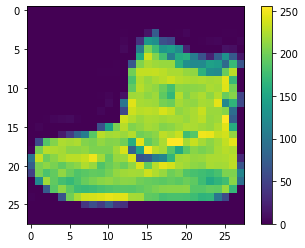

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

> Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

> To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

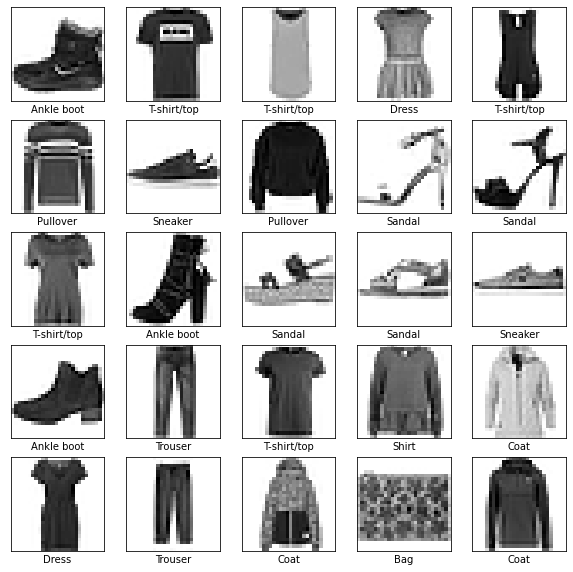

In [14]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

## Build the Model
> Building the neural network requires configuring the layers of the model, then compiling the model.

#### Set-up the layers
> The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.

> Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [18]:
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape = (28, 28)),
                            tf.keras.layers.Dense(128, activation = 'relu'),
                            tf.keras.layers.Dense(10)
])

+ **tf.keras.layers.Flatten()** = first layer of network.
      
      - It transforms the format of the images **from a two-dimensional array** (of 28*28 pixels) to a one-dimensional array 
        (of 28*28 = 784pixels).
      - It as a unstacking rows of pixels in the image and lining them up. It only reformats the data.

+ **tf.keras.layers.Dense()** = sencond layer of network.

      - densely connected, or fully connected, neural layers.
      - The first **Dense** layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of
        10.
      - Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compile the Model

Model needs a few more settings and these are added during the model's compile step:

+ Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
+ Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [19]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

## Train Model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. . Verify that the predictions match the labels from the test_labels array.

##### Feed the Model

 - start training, call the model.fit method—so called because it "fits" the model to the training data:

In [20]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6171 - accuracy: 0.7851
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3793 - accuracy: 0.8621
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3411 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3169 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2892 - accuracy: 0.8947
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2508 - accuracy: 0.9064
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2413 - accuracy: 0.9110
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

##### Evaluate Model

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy : ", test_acc)

313/313 - 0s - loss: 0.3336 - accuracy: 0.8874

Test Accuracy :  0.8873999714851379


##### Predictions

In [23]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([2.7874605e-06, 2.1919742e-07, 1.5355065e-08, 6.3814025e-09,
       5.0878462e-08, 2.3039682e-02, 2.4162209e-06, 1.4950613e-02,
       8.7176534e-07, 9.6200329e-01], dtype=float32)

In [24]:
# let's  see which label has the highest confidence value:

np.argmax(predictions[0])

9

In [25]:
# the model is most confident that this image is an ankle boot, or class_names[9]. 
# Examining the test label shows that this classification is correct:

test_labels[0]


9

In [26]:
# graph

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

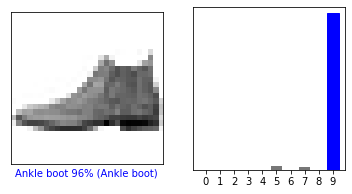

In [27]:
# Verify the Predictions

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

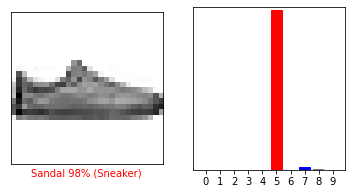

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

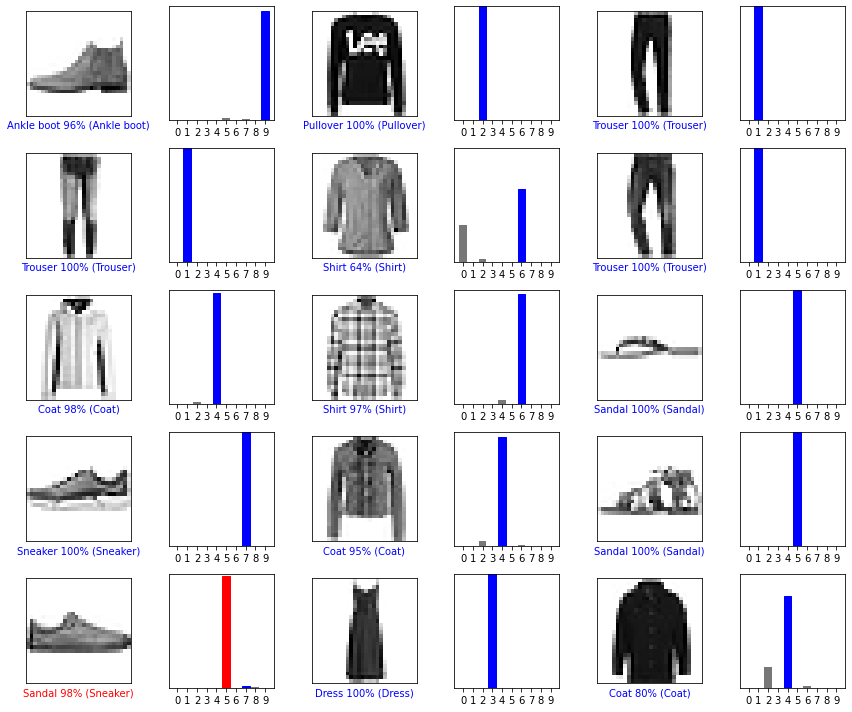

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### Use the trained model

Use the trained model to make a prediction about a single image

In [30]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


**tf.keras** models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [35]:
# Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.8519764e-06 4.0252403e-15 9.9985003e-01 4.9461520e-13 5.4428907e-05
  1.4248000e-11 8.6595843e-05 5.6249759e-13 1.9566895e-11 4.7757687e-16]]


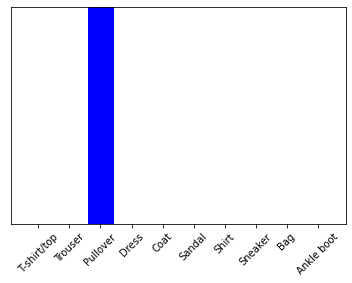

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

**tf.keras.Model.predict** returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [36]:
np.argmax(predictions_single[0])

2